In [3]:
import pandas as pd
import numpy as np

### MovieLense dataset

You can download dataset from here: https://grouplens.org/datasets/movielens/latest/

In [4]:
# !curl http://files.grouplens.org/datasets/movielens/ml-latest-small.zip --output ml-latest-small.zip
# !unzip ml-latest-small.zip

In [5]:
ratings = pd.read_csv('ml-latest-small/ratings.csv')
movies = pd.read_csv('ml-latest-small/movies.csv', index_col=0)

# Limit to top movies so that we don't run out of memory
n_movies = 1000
movie_idx_map = {v: i for i, v in enumerate(ratings.groupby('movieId').size().sort_values().tail(n_movies).index)}
ratings = ratings[ratings.movieId.isin(movie_idx_map)]

n_users = len(ratings['userId'].unique())
n_movies = len(ratings['movieId'].unique())

# Create matrix
X = np.zeros((n_users, n_movies))
for u, m, r, _ in ratings.values:
    X[int(u) - 1, movie_idx_map[int(m)]] = r

Using SVD we will extract movie to concept similarities. 

In [9]:
k = 20
U, S, V = np.linalg.svd(X)
data = pd.DataFrame(V[:k], columns=movies.loc[movie_idx_map].title)
data

title,Pay It Forward (2000),X-Men Origins: Wolverine (2009),Death Proof (2007),"Virgin Suicides, The (1999)","Lost Boys, The (1987)",Bad Santa (2003),Rocky II (1979),About Schmidt (2002),21 Jump Street (2012),Buffy the Vampire Slayer (1992),...,Schindler's List (1993),Terminator 2: Judgment Day (1991),Braveheart (1995),Jurassic Park (1993),Star Wars: Episode IV - A New Hope (1977),"Matrix, The (1999)","Silence of the Lambs, The (1991)",Pulp Fiction (1994),"Shawshank Redemption, The (1994)",Forrest Gump (1994)
0,-0.013740,-0.013834,-0.014479,-0.014837,-0.015855,-0.016608,-0.015443,-0.012657,-0.013055,-0.010631,...,-0.076227,-0.081979,-0.077771,-0.080885,-0.099899,-0.105711,-0.095243,-0.107111,-0.105981,-0.109809
1,-0.011250,-0.024457,-0.024160,0.000844,0.008939,-0.009214,0.001750,0.004903,-0.030972,0.002863,...,0.048985,0.078242,0.095468,0.092870,0.023382,-0.035287,0.075200,0.066094,0.032788,0.051767
2,0.001458,-0.007746,-0.001571,0.018164,0.021655,0.009750,0.015829,0.017258,-0.011936,0.007625,...,-0.052819,-0.080936,-0.131230,-0.105519,0.015748,-0.002344,-0.065713,-0.083778,-0.134976,-0.150658
3,-0.020321,-0.012819,-0.009553,-0.007793,-0.019447,-0.020242,-0.013159,-0.014629,-0.017410,-0.023973,...,0.140400,0.049982,0.091585,0.011390,0.060125,0.127014,0.167883,0.197865,0.203880,0.115254
4,-0.023331,0.018597,0.008455,-0.047220,-0.004637,-0.002883,0.008537,-0.013256,-0.000489,-0.002727,...,-0.072136,0.125815,0.055847,0.051397,0.139230,0.105409,-0.021655,-0.049932,-0.072611,-0.044770
5,0.018199,0.036357,0.043401,0.001917,0.012641,0.043390,0.033525,0.009536,0.038427,0.014844,...,-0.060634,-0.007255,-0.010162,-0.021724,-0.104246,-0.158481,0.006284,0.027659,-0.048065,-0.075252
6,0.001026,-0.011047,0.005113,0.009880,0.017532,0.023910,-0.020644,0.004396,-0.027700,0.005198,...,-0.037308,0.009797,0.045087,-0.020993,-0.095660,0.016492,-0.034036,0.048123,-0.014165,-0.047230
7,-0.003380,0.008470,-0.000499,0.020740,-0.012323,-0.002078,-0.004215,0.026335,-0.042955,-0.007411,...,-0.032278,0.038842,-0.010127,0.004377,-0.011656,-0.045959,-0.038364,-0.037230,-0.065388,-0.107479
8,-0.034645,-0.006897,-0.000399,-0.019876,0.012274,0.003739,-0.008065,-0.018824,0.024425,0.005707,...,-0.104706,0.029340,-0.022012,0.042776,0.051743,0.032488,0.017145,0.089404,0.002659,0.003673
9,0.015903,-0.000305,0.005696,0.043266,0.012414,-0.025808,-0.003037,-0.007873,0.030505,0.010252,...,0.023747,0.014477,0.053049,-0.039673,-0.068472,0.119593,0.020346,0.000522,-0.055144,0.070372


Now using any distance measure we can try to extract similar movies directly from V!

In [10]:
(data - data[['Toy Story (1995)']].values).pow(2).mean().sort_values().head(10)

title
Toy Story (1995)                              0.000000
Toy Story 2 (1999)                            0.002411
Nutty Professor, The (1996)                   0.002757
Twister (1996)                                0.002821
Willy Wonka & the Chocolate Factory (1971)    0.002958
Hunchback of Notre Dame, The (1996)           0.003167
Bug's Life, A (1998)                          0.003306
Multiplicity (1996)                           0.003310
Dragonheart (1996)                            0.003376
Rumble in the Bronx (Hont faan kui) (1995)    0.003380
dtype: float64

In [11]:
(data - data[['Matrix, The (1999)']].values).pow(2).mean().sort_values().head(10)

title
Matrix, The (1999)                                           0.000000
Fight Club (1999)                                            0.003215
Saving Private Ryan (1998)                                   0.003370
Gladiator (2000)                                             0.003589
Star Wars: Episode I - The Phantom Menace (1999)             0.003986
Star Wars: Episode V - The Empire Strikes Back (1980)        0.004086
Lord of the Rings: The Fellowship of the Ring, The (2001)    0.004136
Payback (1999)                                               0.004558
Memento (2000)                                               0.004605
Intouchables (2011)                                          0.004631
dtype: float64

**TASK:** naively in the recommender examples above we have not done any preprocessing. Actually it would be beneficial to remove movie bias by calculating average rating per movie, and subtracting this average from each user/movie pair. Try to add such a fix and see if that improves results. For evaluation you will need to make a train and test split.

## Using autoencoder

In [12]:
from tensorflow import keras

Init Plugin
Init Graph Optimizer
Init Kernel


In [13]:
X.shape

(610, 1000)

In [15]:
means = X.mean(axis=0)
X = X - means

In [64]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(20, use_bias=False))       # Embedding
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(X.shape[0], use_bias=False))
model.compile(loss='mse', optimizer='adam')

history = model.fit(X.T, X.T, epochs=1000, verbose=0)   # Verbose 0 allows to hide prints during training

2023-06-25 19:28:44.410700: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


<AxesSubplot:>

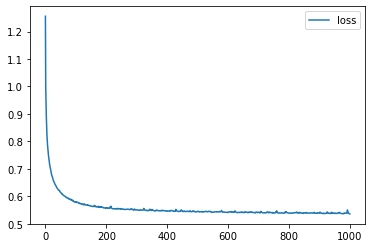

In [65]:
pd.DataFrame(history.history).plot()

In [66]:
V = model.layers[1](model.layers[0](X.T))
data = pd.DataFrame(V.numpy().T, columns=movies.loc[movie_idx_map].title)

In [67]:
(data - data[['Toy Story (1995)']].values).pow(2).mean().sort_values().head(10)

title
Toy Story (1995)                                     0.000000
Independence Day (a.k.a. ID4) (1996)                51.728802
Mission: Impossible (1996)                          53.187756
Twister (1996)                                      55.080891
Toy Story 2 (1999)                                  61.601013
Babe (1995)                                         64.709976
Star Wars: Episode I - The Phantom Menace (1999)    65.045105
Star Trek: First Contact (1996)                     65.171104
Back to the Future (1985)                           65.500015
Jurassic Park (1993)                                66.719406
dtype: float32

In [68]:
(data - data[['Matrix, The (1999)']].values).pow(2).mean().sort_values().head(10)

title
Matrix, The (1999)                                                                 0.000000
Fight Club (1999)                                                                 59.335762
Gladiator (2000)                                                                  61.667793
Saving Private Ryan (1998)                                                        73.272369
Braveheart (1995)                                                                 73.928406
Sixth Sense, The (1999)                                                           75.133926
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    81.762985
Terminator, The (1984)                                                            83.842819
Terminator 2: Judgment Day (1991)                                                 84.874664
Léon: The Professional (a.k.a. The Professional) (Léon) (1994)                    85.185051
dtype: float32

## VAE

In [69]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

original_dim = X.shape[0]
intermediate_dim = 64
latent_dim = 20

# encoder architecture
inputs = Input(shape=(original_dim,))
x = Dense(intermediate_dim, activation='relu')(inputs)
z_mean = Dense(latent_dim)(x)
z_log_var = Dense(latent_dim)(x)

# reparameterization trick
def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

# instantiate encoder model
encoder = Model(inputs, [z_mean, z_log_var, z], name="encoder")

# build decoder model
latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
x = Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = Dense(original_dim)(x)

# instantiate decoder model
decoder = Model(latent_inputs, outputs, name="decoder")

# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs, name='vae')

# Define VAE loss
reconstruction_loss = tf.keras.losses.mean_squared_error(inputs, outputs)
reconstruction_loss *= original_dim
kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
kl_loss = tf.reduce_sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = tf.reduce_mean(reconstruction_loss + kl_loss)

vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

# train the model
history = vae.fit(X.T, X.T, epochs=1000, verbose=0)

# get the embeddings
V = encoder.predict(X.T)[2]


2023-06-25 19:40:38.139797: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2023-06-25 19:46:19.394464: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


<AxesSubplot:>

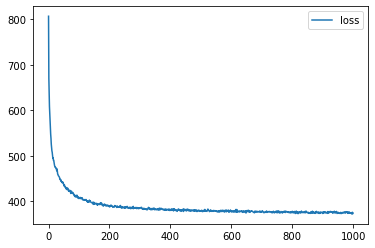

In [70]:
pd.DataFrame(history.history).plot()

In [71]:
data = pd.DataFrame(V.T, columns=movies.loc[movie_idx_map].title)

In [72]:
(data - data[['Toy Story (1995)']].values).pow(2).mean().sort_values().head(10)

title
Toy Story (1995)                        0.000000
Monsters, Inc. (2001)                   4.179930
Toy Story 2 (1999)                      4.402090
James and the Giant Peach (1996)        4.596642
Dumbo (1941)                            4.659690
Twister (1996)                          4.686428
Toy Story 3 (2010)                      4.719041
Nutty Professor, The (1996)             4.818818
Independence Day (a.k.a. ID4) (1996)    4.866961
Craft, The (1996)                       4.867783
dtype: float32

In [73]:
(data - data[['Matrix, The (1999)']].values).pow(2).mean().sort_values().head(10)

title
Matrix, The (1999)                                       0.000000
Saving Private Ryan (1998)                               3.851384
WALL·E (2008)                                            4.229498
Star Wars: Episode V - The Empire Strikes Back (1980)    4.380696
Aliens (1986)                                            4.442731
Fight Club (1999)                                        4.954143
Star Wars: Episode VI - Return of the Jedi (1983)        5.059809
Terminator, The (1984)                                   5.075067
Fifth Element, The (1997)                                5.118755
Up (2009)                                                5.145713
dtype: float32